In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
#matplotlib inline

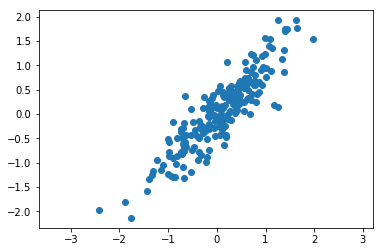

In [3]:
X=np.random.randn(2,200)
scale=np.array([[1,0], [0,0.25]])
rotate=np.array([[1,-1], [1,1]]) / math.sqrt(2)
#rotate=np.array([[1,-1], [1,1]]) / math.sqrt(2)
#rotate=np.array([[-1,1], [1,1]]) / math.sqrt(2)
#rotate=np.array([[1,0], [0,1]])
X=np.dot(scale, X)
X=np.dot(rotate, X)
X=X.T
plt.axis('equal')
plt.scatter(X[:,0], X[:,1]);

[[-0.68507627 -0.72847135]
 [ 0.72847135 -0.68507627]]
[1.03914028 0.05716911]
[0.06949694 0.05096486]


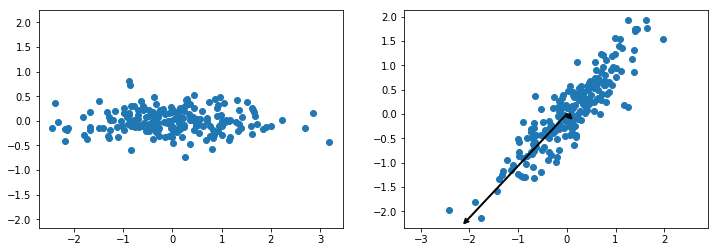

In [27]:
from sklearn.decomposition import PCA
def arrow(v1, v2, ax):
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v2, v1, arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
Z=pca.transform(X)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].axis('equal')
axes[0].scatter(Z[:,0], Z[:,1])
axes[1].axis('equal')
axes[1].scatter(X[:,0], X[:,1])
for l, v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0], v*l*3, axes[1])
print(pca.components_)
print(pca.explained_variance_)
print(pca.mean_)

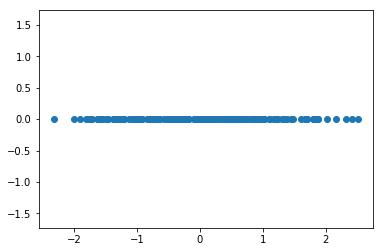

In [43]:
pca=PCA(1)
pca.fit(X)
Z=pca.transform(X)
plt.axis('equal')
plt.scatter(Z[:,0],np.zeros(200));